<h1>Segmentasi Pelanggan dengan KMeans</h1>

## K-Means

__K-Means__ adalah salah satu algoritma yang dapat digunakan untuk <i>unsupervised learning</i> seperti <i>clustering</i>. Algoritma ini berbasis <i>centroid</i> atau dapat dikatakan juga berbasis jarak, dimana tiap <i>cluster</i> memiliki <i>centriod</i> masing-masing sebagai pusatnya. K-Means meminimalkan jarak antara <i>data point</i> dengan pusat <i>cluster</i> masing-masing.

## Dataset

Dataset <a href='https://www.kaggle.com/arjunbhasin2013/ccdata'>Credit Card</a>. 

Dataset terdiri perilaku penggunaan kartu kredit dari 9000 pemegang kartu kredit. Dataset ini digunakan untuk membangun segmentasi pelanggan bertujuan menentukan strategi <i>marketing</i>.

__Dataset Information:__

* CUSTID : Identification of Credit Card holder (Categorical)
* BALANCE : Balance amount left in their account to make purchases 
* BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
* PURCHASES : Amount of purchases made from account
* ONEOFF_PURCHASES : Maximum purchase amount done in one-go
* INSTALLMENTS_PURCHASES : Amount of purchase done in installment
* CASH_ADVANCE : Cash in advance given by the user
* PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* ONEOFF_PURCHASES_FREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
* PURCHASES_INSTALLMENTS_FREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
* CASH_ADVANCE_FREQUENCY : How frequently the cash in advance being paid
* CASH_ADVANCE_TRX : Number of Transactions made with "Cash in Advanced"
* PURCHASES_TRX : Numbe of purchase transactions made
* CREDIT_LIMIT : Limit of Credit Card for user
* PAYMENTS : Amount of Payment done by user
* MINIMUM_PAYMENTS : Minimum amount of payments made by user
* PRC_FULL_PAYMENT : Percent of full payment paid by user
* TENURE : Tenure of credit card service for user

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
%cd /content/gdrive/My Drive/Colab Notebooks/DATASET/datasets_py/

/content/gdrive/My Drive/Colab Notebooks/DATASET/datasets_py


In [4]:
# Load dataset

df = pd.read_csv('credit-card-data.csv')
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [5]:
# Menampilkan deskripsi statistik

df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
# Cek tipe data

df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


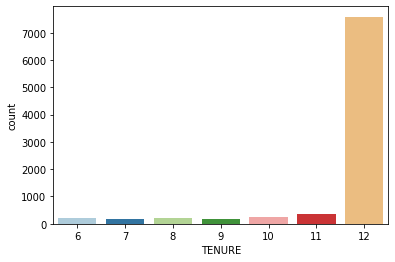

In [7]:
# Countplot dari kolom 'TENURE'

sns.countplot(df['TENURE'], palette='Paired')

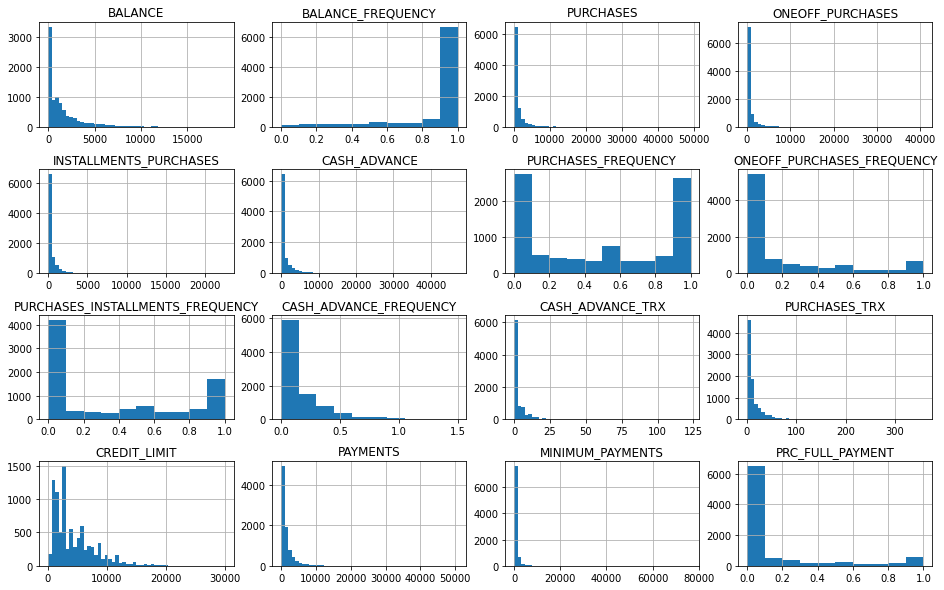

In [8]:
# Menampilkan histogram dari kolom fitur numerik

fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(16, 10)) 

# Menambahkan subplot dengan indexing
ax0 = fig.add_subplot(ax[0,0]) 
ax1 = fig.add_subplot(ax[0,1])  
ax2 = fig.add_subplot(ax[0,2])  
ax3 = fig.add_subplot(ax[0,3]) 
ax4 = fig.add_subplot(ax[1,0])  
ax5 = fig.add_subplot(ax[1,1]) 
ax6 = fig.add_subplot(ax[1,2])
ax7 = fig.add_subplot(ax[1,3])

ax8 = fig.add_subplot(ax[2,0]) 
ax9 = fig.add_subplot(ax[2,1])  
ax10 = fig.add_subplot(ax[2,2])  
ax11 = fig.add_subplot(ax[2,3]) 
ax12 = fig.add_subplot(ax[3,0])  
ax13 = fig.add_subplot(ax[3,1]) 
ax14 = fig.add_subplot(ax[3,2])
ax15 = fig.add_subplot(ax[3,3])

df.hist(column='BALANCE', bins=50, ax=ax0)
df.hist(column='BALANCE_FREQUENCY', bins=10, ax=ax1)
df.hist(column='PURCHASES', bins=50, ax=ax2)
df.hist(column='ONEOFF_PURCHASES', bins=50, ax=ax3)
df.hist(column='INSTALLMENTS_PURCHASES', bins=50, ax=ax4)
df.hist(column='CASH_ADVANCE', bins=50, ax=ax5)
df.hist(column='PURCHASES_FREQUENCY', bins=10, ax=ax6)
df.hist(column='ONEOFF_PURCHASES_FREQUENCY', bins=10, ax=ax7)

df.hist(column='PURCHASES_INSTALLMENTS_FREQUENCY', bins=10, ax=ax8)
df.hist(column='CASH_ADVANCE_FREQUENCY', bins=10, ax=ax9)
df.hist(column='CASH_ADVANCE_TRX', bins=50, ax=ax10)
df.hist(column='PURCHASES_TRX', bins=50, ax=ax11)
df.hist(column='CREDIT_LIMIT', bins=50, ax=ax12)
df.hist(column='PAYMENTS', bins=50, ax=ax13)
df.hist(column='MINIMUM_PAYMENTS', bins=50, ax=ax14)
df.hist(column='PRC_FULL_PAYMENT', bins=10, ax=ax15)

plt.subplots_adjust(wspace=0.2, hspace=0.4)
plt.show()

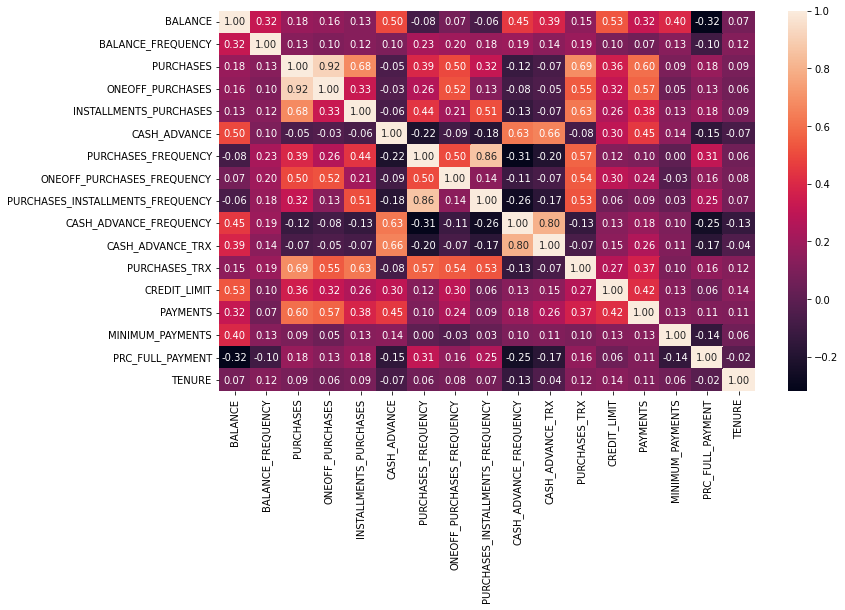

In [9]:
# Menampilkan korelasi antarkolom dengan heatmap

plt.figure(figsize=(12,7))

corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f')

## Data Preparation

hapus kolom <code>CUST_ID</code> karena ID bukan merupakan fitur yang penting untuk pemodelan.

In [10]:
# Menghapus kolom 'CUST_ID'

df_cc = df.drop('CUST_ID', axis=1)
df_cc.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Normalisasi

normalisasi untuk dataframe <code>df_cc</code>.

In [11]:
from sklearn.preprocessing import StandardScaler

X = df_cc.values[:,:]
X = np.nan_to_num(X)

cc_norm = StandardScaler().fit_transform(X)
cc_norm

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.2973097 ,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.10204243,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.08848934,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.32175099,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.33316552,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.31923775,
        -0.52555097, -4.12276757]])

## Modeling

### Customer segmentation dengan K-Means

menerapakan proses <i>modeling</i> dengan K-Means untuk segmentasi pelanggan. Definisikan jumlah klasternya adalah 3.

In [12]:
from sklearn.cluster import KMeans

clusterNum = 3

k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)

KMeans(n_clusters=3, n_init=12)

Setelah pemodelan, tampilkan label klaster dengan atribut <code>.labels_</code>.

In [13]:
# Menampilkan label klaster

k_means_labels = k_means.labels_
k_means_labels

array([1, 2, 2, ..., 1, 1, 1], dtype=int32)

tampilkan <i>cluster center</i> dengan atribut <code>.cluster_centers_</code>. Outputnya adalah berupa array (n_cluster, n_features).

In [14]:
# Menampilkan cluster centers

k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[4.79720357e+03, 9.08473866e-01, 1.04707237e+04, 7.39299015e+03,
        3.07789769e+03, 5.38998332e+03, 7.37381261e-01, 5.82882687e-01,
        5.92929851e-01, 2.29106075e-01, 9.18656716e+00, 8.37910448e+01,
        1.24705224e+04, 1.79906949e+04, 2.45561022e+03, 3.26799679e-01,
        1.18432836e+01],
       [8.54260915e+02, 8.54263876e-01, 6.03956158e+02, 3.12577406e+02,
        2.91677538e+02, 4.94382355e+02, 4.67668911e-01, 1.54205256e-01,
        3.52364126e-01, 1.06725312e-01, 2.25191659e+00, 1.06746397e+01,
        2.74668408e+03, 9.96887876e+02, 5.48062559e+02, 1.57080044e-01,
        1.14329960e+01],
       [3.39482770e+03, 9.40858106e-01, 1.58526776e+03, 9.90856125e+02,
        5.94723727e+02, 2.09863861e+03, 5.40406139e-01, 3.17420796e-01,
        3.85415334e-01, 2.10452439e-01, 5.73626853e+00, 2.21469050e+01,
        8.99559919e+03, 2.87671387e+03, 1.55215175e+03, 1.34036137e-01,
        1.17380122e+01]])

### Insight

In [15]:
# Memasukkan label ke dalam dataframe

df['CLUSTER'] = k_means_labels
df.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,2
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


cek jumlah data pada masing-masing klaster.

In [16]:
# Jumlah data pada tiap klaster

df['CLUSTER'].value_counts()

1    6521
2    2295
0     134
Name: CLUSTER, dtype: int64

menampilkan nilai <i>centroid</i> dengan merata-ratakan nilai fitur pada tiap klaster.

In [17]:
# Mengecek centroid

df.groupby('CLUSTER').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CLUSTER,,,,,,,,,,,,,,,,,
0,4797.203573,0.908474,10470.723657,7392.990149,3077.897687,5389.983323,0.737381,0.582883,0.592930,0.229106,9.186567,83.791045,12470.522388,17990.694944,2474.073451,0.326800,11.843284
1,854.377419,0.854242,603.834153,312.410718,291.722267,494.458169,0.467600,0.154088,0.352418,0.106742,2.252262,10.674436,2746.376317,996.968420,572.430235,0.157058,11.432909
2,3393.389665,0.940884,1585.186832,991.034205,594.464588,2097.724171,0.540570,0.317682,0.385247,0.210361,5.733769,22.142484,8994.947514,2875.665920,1575.595464,0.134108,11.738126


### Visualisasi

visualisasikan klaster dengan <i>scatter plot</i>.

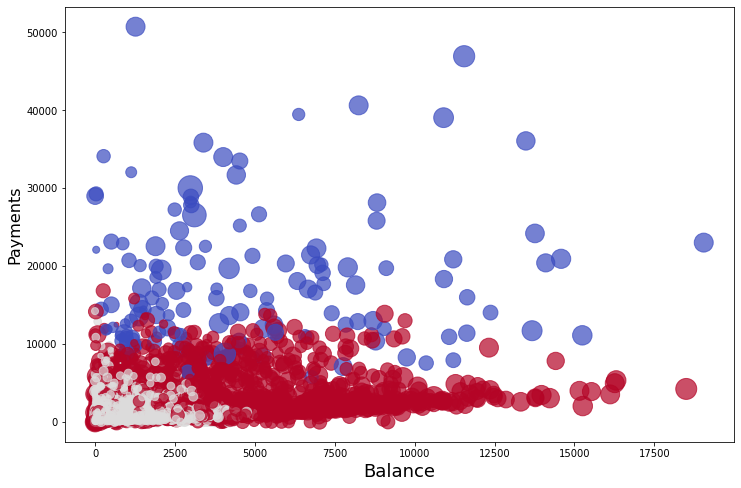

In [18]:
# Visualisasi klaster

plt.figure(figsize=(12,8))

area = df['CREDIT_LIMIT']/50
plt.scatter(df['BALANCE'], df['PAYMENTS'], s=area, c=df['CLUSTER'], cmap='coolwarm', alpha=0.7)
plt.xlabel('Balance', fontsize=18)
plt.ylabel('Payments', fontsize=16)

plt.show()

visualisasi 3D dengan <code>Axes3D</code> dari <code>mpl_toolkits.mplot3d</code> seperti di bawah ini.

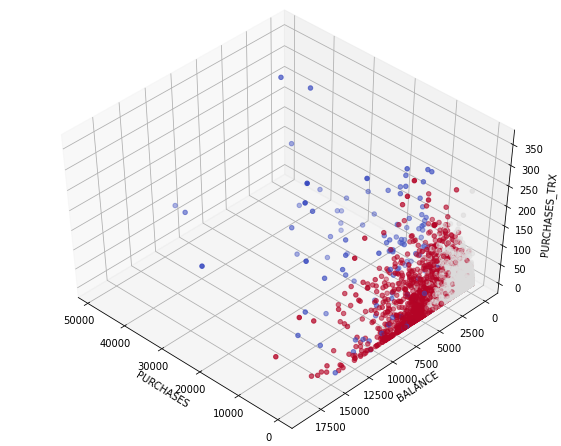

In [19]:
from mpl_toolkits.mplot3d import Axes3D 

fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('PURCHASES')
ax.set_ylabel('BALANCE')
ax.set_zlabel('PURCHASES_TRX')

ax.scatter(df['PURCHASES'], df['BALANCE'], df['PURCHASES_TRX'], c=df['CLUSTER'], cmap='coolwarm')


Dari hasil di atas, dapat kita simpulkan untuk masing-masing klaster (0, 1, dan 2)

* __Klaster 0 (Biru) :__ Bersaldo rendah serta sedikit melakukan pembelian dan memiliki jumlah total pengeluaran untuk pembelian yang juga rendah.
* __Klaster 1 (Abu-abu) :__  Bersaldo sedang hingga tingi, intensitas pembelian dari rendah hingga sedang, dan total pengeluaran untuk pembelian juga dari rendah hingga sedang.
* __Klaster 2 (Merah) :__  Saldo, jumlah pembelian, dan total pengeluaran dapat dikatakan dari level sedang hingga tinggi.

Definisi tiap klaster bisa berbeda tergantung pada variabel apa yang ingin dilihat. 



---


Semoga Bermanfaat dan jangan lupa main-main kesini: <a href="https://nurpurwanto.github.io/">**nurpurwanto**</a> Terimakasih.

---


